# Cardiovascular Disease Prediction Model

## Data Description
The dataset consists of 70 000 records of patients data, 11 features + target.

Attribute information: 
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | 1 - female; 2 - male |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

The names and social security numbers of the patients were recently
removed from the database, replaced with dummy values.

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import sklearn
import sklearn.ensemble
import sklearn.metrics

from sklearn.ensemble import RandomForestClassifier

In [2]:
import shap
shap.initjs()

import matplotlib.pyplot as plt
import numpy as np

from alibi.explainers import KernelShap
from sklearn import svm
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
heart = pd.read_csv("cardio_min.csv")

drop_indices = np.random.choice(heart.index, 16000, replace=False)
heart = heart.drop(drop_indices)
heart = heart.drop(columns=['id'])

heart.head()

,age,gender,cholesterol,gluc,smoke,cardio,bmi,weight_status,age_group,systolic_bp,diastolic_bp
3,51.55,2,1,1,0,0,20.05,2,5,120,80
6,47.90,1,1,1,0,0,28.67,3,5,100,70
14,49.88,1,2,1,0,1,40.77,4,5,150,90
16,46.20,2,2,1,0,0,22.86,2,5,120,80
25,42.30,2,2,2,0,1,17.84,1,4,130,80


In [4]:
heart.describe()

,age,gender,cholesterol,gluc,smoke,cardio,bmi,weight_status,age_group,systolic_bp,diastolic_bp
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,53.389361,1.347870,1.351531,1.223702,0.087550,0.496338,27.651788,2.897137,5.301265,126.402130,81.351864
std,6.863587,0.476374,0.670183,0.570583,0.282686,0.500070,6.457442,0.809372,0.720832,17.604152,9.913799
min,29.580000,1.000000,1.000000,1.000000,0.000000,0.000000,13.520000,1.000000,3.000000,11.000000,0.000000
25%,48.480000,1.000000,1.000000,1.000000,0.000000,0.000000,23.830000,2.000000,5.000000,120.000000,80.000000
50%,54.030000,1.000000,1.000000,1.000000,0.000000,0.000000,26.330000,3.000000,5.000000,120.000000,80.000000
75%,59.272500,2.000000,1.000000,1.000000,0.000000,1.000000,30.330000,4.000000,6.000000,140.000000,90.000000
max,64.850000,2.000000,3.000000,3.000000,1.000000,1.000000,165.470000,4.000000,6.000000,200.000000,160.000000


In [5]:
# Supress jupyter warnings if required for cleaner output
import warnings
warnings.simplefilter('ignore')

In [6]:
from sklearn.model_selection import train_test_split

X = heart.drop("cardio", axis = 1)
y = heart["cardio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [7]:
# MLPClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.7054908485856906

In [8]:
predict_fn = lambda x: model.predict_proba(x)

In [9]:
class_names=['low risk', 'high risk']

In [10]:
feature_names = X.columns

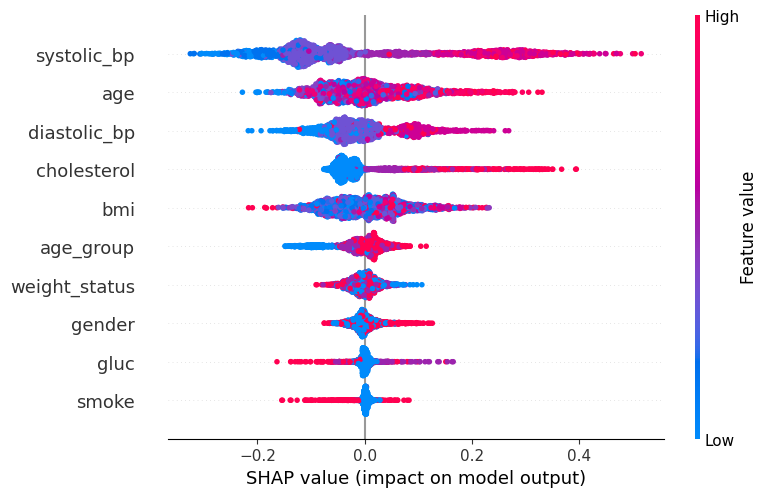

In [11]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values[:,:,1])

In [12]:
np.random.seed(0)
explainer = KernelShap(predict_fn)
explainer.fit(X_train)

Large datasets can cause slow runtimes for shap. The background dataset provided has 2403 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 2403 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': None,
              'transpose': False,
              'kwargs': {}}
            ,
  'version': '0.9.4'}
)

In [13]:
explanation = explainer.explain(X_test, l1_reg=False)

100%|███████████████████████████████████████████████████████████████████████████████████████| 601/601 [2:21:33<00:00, 14.13s/it]


In [14]:
print("Output type:", type(explanation.shap_values))
print("Output size:", len(explanation.shap_values))
print("Class output size:", explanation.shap_values[0].shape)

Output type: <class 'list'>
Output size: 2
Class output size: (601, 10)


In [15]:
idx = 27
instance = [X_test.iloc[idx]]
pred = model.predict(instance)
scores =  model.predict_proba(instance)
class_idx = pred.item()
print("The predicted class for the X_test[{}] is {}.".format(idx, * pred))
print("OVR decision function values are {}.".format(*scores))

The predicted class for the X_test[27] is 0.
OVR decision function values are [0.7 0.3].


### Local Explanation

In [16]:
shap.force_plot(
    explainer.expected_value[1],
    explanation.shap_values[1][idx, :] ,
    instance,
    feature_names,
)

In [17]:
def class_labels(classifier, instance, class_names=None):
    """
    Creates a set of legend labels based on the decision
    scores of a classifier and, optionally, the class names.
    """

    decision_scores = classifier.predict_proba(instance)

    if not class_names:
        class_names = [f'Class {i}' for i in range(decision_scores.shape[1])]

    for i, score in enumerate(np.nditer(decision_scores)):
        class_names[i] = class_names[i] + ' ({})'.format(round(score.item(),3))

    return class_names

In [18]:
legend_labels = class_labels(model, instance, class_names)

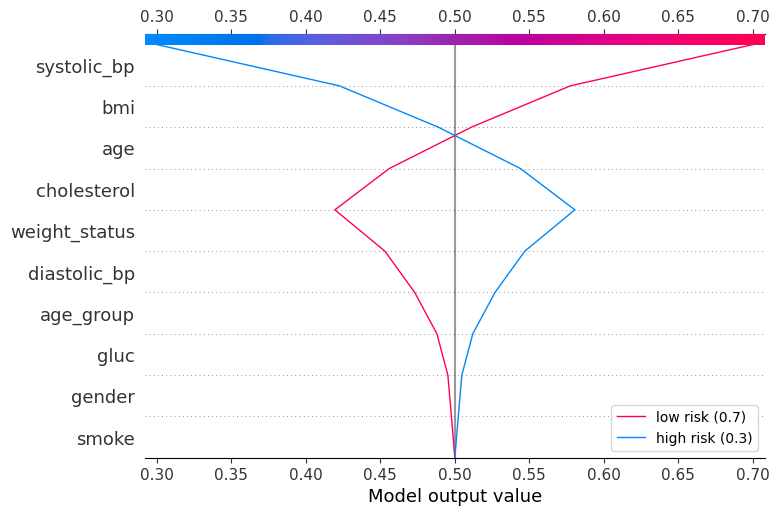

In [19]:
r = shap.multioutput_decision_plot(explainer.expected_value.tolist(),
                                   explanation.shap_values,
                                   idx,
                                   feature_names=np.array(feature_names),
                                   feature_order='importance',
                                   legend_labels=legend_labels,
                                   return_objects=True,
                                   legend_location='lower right')


### Global Explanation

In [20]:
class_idx = 0 # we explain the predicted label
shap.force_plot(
    explainer.expected_value[class_idx],
    explanation.shap_values[class_idx],
    X_test,
    feature_names,
)

In [21]:
shap.force_plot(
    explainer.expected_value[1],
    explanation.shap_values[1],
    X_test,
    feature_names,
)

In [22]:
print(explainer.expected_value)

[0.49823554 0.50176446]


In [23]:
print(explainer)

KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': False,
              'transpose': False,
              'kwargs': {}}
            ,
  'version': '0.9.4'}
)


### Summary plot

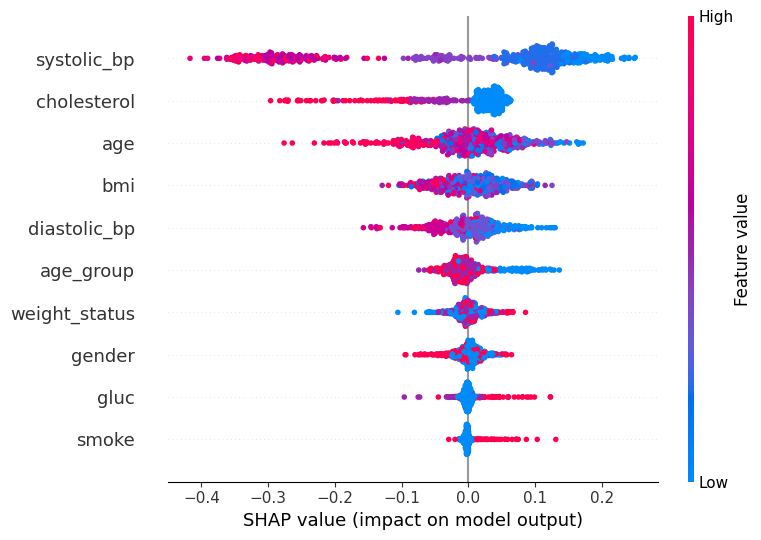

In [24]:
shap.summary_plot(explanation.shap_values[0], X_test, feature_names)

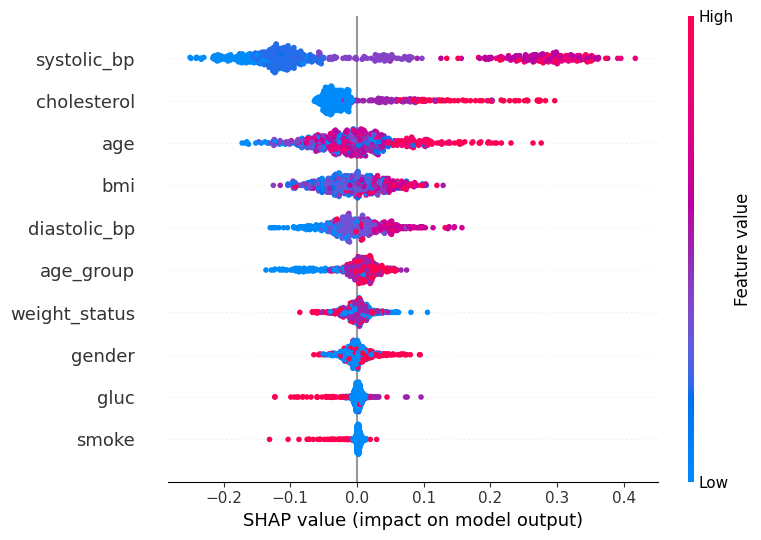

In [25]:
shap.summary_plot(explanation.shap_values[1], X_test, feature_names)

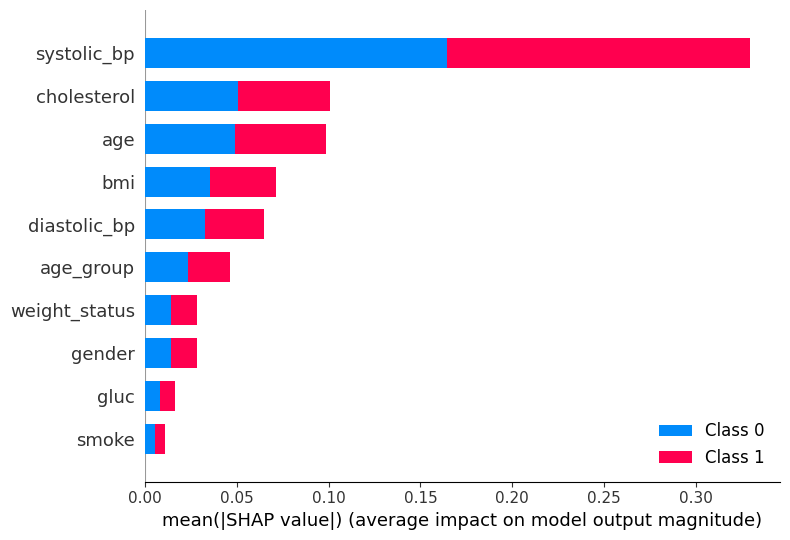

In [26]:
shap.summary_plot(explanation.shap_values, X_test, feature_names)

### Dependence plot

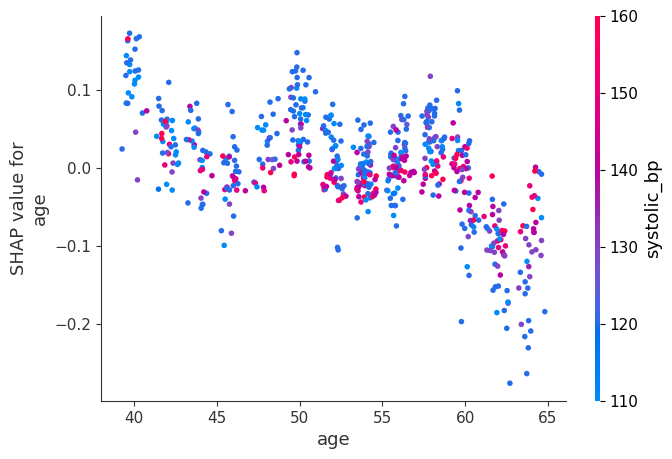

In [28]:
feature = 'age'
shap.dependence_plot(
    feature,
    explanation.shap_values[0],
    X_test,
    feature_names=feature_names,
    interaction_index='auto',
)